In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler

df_melbourne = pd.read_csv("../../Kaggle/Melbourne-House-Snapshot/melb_data.csv")
df_melbourne.head(n=10)

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford    40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford         55a Park St      4    h  1600000.0     VB  Nelson   
5  Abbotsford      129 Charles St      2    h   941000.0      S  Jellis   
6  Abbotsford        124 Yarra St      3    h  1876000.0      S  Nelson   
7  Abbotsford       98 Charles St      2    h  1636000.0      S  Nelson   
8  Abbotsford  6/241 Nicholson St      1    u   300000.0      S  Biggin   
9  Abbotsford       10 Valiant St      2    h  1097000.0      S  Biggin   

        Date  Distance  Postcode      ...       Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0      ...            1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0      ...            1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0      ...            2.0  0.0     134.0   
3  4/03/2017       2.5    3067.0      ...            2.0  1.0      94.0   
4  4/06/2016       2.5    3067.0      ...            1.0  2.0     120.0   
5  7/05/2016       2.5    3067.0      ...            1.0  0.0     181.0   
6  7/05/2016       2.5    3067.0      ...            2.0  0.0     245.0   
7  8/10/2016       2.5    3067.0      ...            1.0  2.0     256.0   
8  8/10/2016       2.5    3067.0      ...            1.0  1.0       0.0   
9  8/10/2016       2.5    3067.0      ...            1.0  2.0     220.0   

   BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
0           NaN        NaN        Yarra  -37.7996    144.9984   
1          79.0     1900.0        Yarra  -37.8079    144.9934   
2         150.0     1900.0        Yarra  -37.8093    144.9944   
3           NaN        NaN        Yarra  -37.7969    144.9969   
4         142.0     2014.0        Yarra  -37.8072    144.9941   
5           NaN        NaN        Yarra  -37.8041    144.9953   
6         210.0     1910.0        Yarra  -37.8024    144.9993   
7         107.0     1890.0        Yarra  -37.8060    144.9954   
8           NaN        NaN        Yarra  -37.8008    144.9973   
9          75.0     1900.0        Yarra  -37.8010    144.9989   

              Regionname Propertycount  
0  Northern Metropolitan        4019.0  
1  Northern Metropolitan        4019.0  
2  Northern Metropolitan        4019.0  
3  Northern Metropolitan        4019.0  
4  Northern Metropolitan        4019.0  
5  Northern Metropolitan        4019.0  
6  Northern Metropolitan        4019.0  
7  Northern Metropolitan        4019.0  
8  Northern Metropolitan        4019.0  
9  Northern Metropolitan        4019.0  

[10 rows x 21 columns]

In [2]:
df_melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [3]:
df_melbourne.describe().transpose()

count          mean            std          min  \
Rooms          13580.0  2.937997e+00       0.955748      1.00000   
Price          13580.0  1.075684e+06  639310.724296  85000.00000   
Distance       13580.0  1.013778e+01       5.868725      0.00000   
Postcode       13580.0  3.105302e+03      90.676964   3000.00000   
Bedroom2       13580.0  2.914728e+00       0.965921      0.00000   
Bathroom       13580.0  1.534242e+00       0.691712      0.00000   
Car            13518.0  1.610075e+00       0.962634      0.00000   
Landsize       13580.0  5.584161e+02    3990.669241      0.00000   
BuildingArea    7130.0  1.519676e+02     541.014538      0.00000   
YearBuilt       8205.0  1.964684e+03      37.273762   1196.00000   
Lattitude      13580.0 -3.780920e+01       0.079260    -38.18255   
Longtitude     13580.0  1.449952e+02       0.103916    144.43181   
Propertycount  13580.0  7.454417e+03    4378.581772    249.00000   

                         25%            50%           75%           max  
Rooms               2.000000       3.000000  3.000000e+00  1.000000e+01  
Price          650000.000000  903000.000000  1.330000e+06  9.000000e+06  
Distance            6.100000       9.200000  1.300000e+01  4.810000e+01  
Postcode         3044.000000    3084.000000  3.148000e+03  3.977000e+03  
Bedroom2            2.000000       3.000000  3.000000e+00  2.000000e+01  
Bathroom            1.000000       1.000000  2.000000e+00  8.000000e+00  
Car                 1.000000       2.000000  2.000000e+00  1.000000e+01  
Landsize          177.000000     440.000000  6.510000e+02  4.330140e+05  
BuildingArea       93.000000     126.000000  1.740000e+02  4.451500e+04  
YearBuilt        1940.000000    1970.000000  1.999000e+03  2.018000e+03  
Lattitude         -37.856822     -37.802355 -3.775640e+01 -3.740853e+01  
Longtitude        144.929600     145.000100  1.450583e+02  1.455264e+02  
Propertycount    4380.000000    6555.000000  1.033100e+04  2.165000e+04

### Remove colunas que necessitam de mais tratamento e análise

In [4]:
df_melbourne.drop(columns=['CouncilArea', 'SellerG', 'Suburb'], inplace=True)

### Cria listas de atributos Numéricos e Categóricos para Tratamento

In [5]:
#Recupera lista de atributos numéricos para aplicar padronização
lista = (df_melbourne.dtypes != 'object')
numerical_cols = list(lista[lista].index)

print("Variáveis Numéricos:")
print(numerical_cols)

#Recupera lista de atributos categóricos para aplicar LabelEncoder
lista = (df_melbourne.dtypes == 'object')
object_cols = list(lista[lista].index)

print("Variáveis Categóricas:")
print(object_cols)

Variáveis Numéricos:
['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
Variáveis Categóricas:
['Address', 'Type', 'Method', 'Date', 'Regionname']


### Separa o Conjunto de Dados em Treino e Teste

In [6]:
from sklearn.model_selection import train_test_split
y = df_melbourne.Price #Variável Dependente
X = df_melbourne.drop(['Price'], axis=1) #Variáveis Independentes

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                      random_state=0)

### LabelEncoder

In [7]:
#Faz uma cópia dos dados originais para não alterá-los
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

#Aplica o LabelEncoder para modificar os atributos categóricos
label_encoder = LabelEncoder()
for col in object_cols:
    _ = label_encoder.fit(pd.concat([X_train[col],X_valid[col]], axis=0))
    label_X_train[col] = _.transform(X_train[col])
    label_X_valid[col] = _.transform(X_valid[col])

### Dados Ausentes

In [8]:
#Insere dados em atributos ausentes
#my_imputer = SimpleImputer(strategy='median') #Versões mais novas do Scikit-Learn
my_imputer = Imputer(strategy='most_frequent')
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(label_X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(label_X_valid))

#O método de inserção de dados ausentes remove as colunas; Coloque-as de volta
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

### Padronização

In [9]:
#Aplica padronização nos atributos numéricos
std_X_train = imputed_X_train.copy()
std_X_valid = imputed_X_valid.copy()

std_numerical_cols = numerical_cols.copy()
del std_numerical_cols[1] #Remove o Atributo Alvo -> Price

for column in std_numerical_cols:
    transformer = StandardScaler()
    
    values = np.array(std_X_train[column]).reshape(-1,1)
    std_X_train[column] = transformer.fit_transform(values)
    
    values = np.array(std_X_valid[column]).reshape(-1,1)
    std_X_valid[column] = transformer.transform(values)

### Limpa os Data Frames da Memória que não serão mais utilizados

In [10]:
del df_melbourne
del label_X_train
del label_X_valid
del imputed_X_train
del imputed_X_valid

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def score_dataset(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    return model

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Avaliando a Importância das Variáveis para o Modelo

<p>Esse tutorial se baseou em (1) e (2). (3) é um outro exemplo de visualização de importância de features comparando o método de (4) com a importância calculado pelo RandomForest.</p>
<ol>
<li> https://machinelearningmastery.com/calculate-feature-importance-with-python/</li>
<li> https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py</li>
<li> https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py</li>
<li> https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance</li>
</ol>

In [12]:
modelo = score_dataset(std_X_train, y_train)

1. feature Distance (20.916%)
2. feature Rooms (17.342%)
3. feature Postcode (16.177%)
4. feature Landsize (9.772%)
5. feature Type (9.121%)
6. feature Longtitude (5.246%)
7. feature BuildingArea (4.448%)
8. feature Bathroom (3.791%)
9. feature Lattitude (3.306%)
10. feature Address (2.047%)
11. feature YearBuilt (1.956%)
12. feature Propertycount (1.918%)
13. feature Date (1.642%)
14. feature Car (0.854%)
15. feature Bedroom2 (0.822%)
16. feature Method (0.531%)
17. feature Regionname (0.111%)


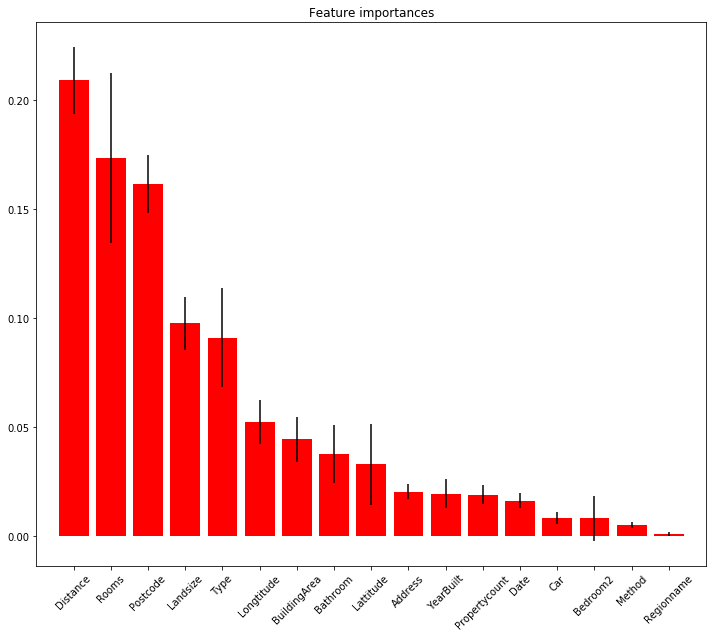

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

#Recupera a importância dos coeficientes obtidos pelo modelo de regressão
importances = modelo.feature_importances_
std = np.std([tree.feature_importances_ for tree in modelo.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# summarize feature importance
for f in range(X.shape[1]):
    print("%d. feature %s (%.3f%%)" % (f + 1, std_X_train.columns[indices[f]], importances[indices[f]]*100))
    
plt.figure(figsize=(12,10))
plt.title("Feature importances")
plt.bar(std_X_train.columns[indices], 
        importances[indices],
        color="r", 
        yerr=std[indices], 
        align="center")
plt.xticks(std_X_train.columns[indices], 
           rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

<p>Baseado no resultado obtido, poderíamos (1) definir um Threshold, 5% por exemplo, para remover os atributos que estarão abaixo desse limite em relação a importância calculada; (2) em contrapartida poderíamos definir um Threshold total, por exemplo, 95% de importância. Dessa forma, basta acumular as importâncias de cada atributo do maior para o menor até atingir o limite definido, então remove-se os atributos que sobrarem.</p>

In [14]:
threshold_per_feature = 0.05

features_per_feature = []

# summarize feature importance
for f in range(X.shape[1]):
    if importances[indices[f]] >= threshold_per_feature:
        print("%d. feature %s (%.3f%%)" % (f + 1, std_X_train.columns[indices[f]], importances[indices[f]]*100))
        features_per_feature.append(std_X_train.columns[indices[f]])
        
print()
print("Features Based on Accumulative Threshold")
print(features_per_feature)

1. feature Distance (20.916%)
2. feature Rooms (17.342%)
3. feature Postcode (16.177%)
4. feature Landsize (9.772%)
5. feature Type (9.121%)
6. feature Longtitude (5.246%)

Features Based on Accumulative Threshold
['Distance', 'Rooms', 'Postcode', 'Landsize', 'Type', 'Longtitude']


In [15]:
threshold_accumulative = 0.95
total = 0

features_accumulative = []

# summarize feature importance
for f in range(X.shape[1]):
    print("%d. feature %s (%.3f%%)" % (f + 1, std_X_train.columns[indices[f]], importances[indices[f]]*100))
    total += importances[indices[f]]
    features_accumulative.append(std_X_train.columns[indices[f]])
    if total >= threshold_accumulative:
        break
        
print()
print("Total: %.3f%% \t Threshold Accumulative: %.3f%%" % (total*100, threshold_accumulative*100))
print()
print("Features Based on Accumulative Threshold")
print(features_accumulative)

1. feature Distance (20.916%)
2. feature Rooms (17.342%)
3. feature Postcode (16.177%)
4. feature Landsize (9.772%)
5. feature Type (9.121%)
6. feature Longtitude (5.246%)
7. feature BuildingArea (4.448%)
8. feature Bathroom (3.791%)
9. feature Lattitude (3.306%)
10. feature Address (2.047%)
11. feature YearBuilt (1.956%)
12. feature Propertycount (1.918%)

Total: 96.041% 	 Threshold Accumulative: 95.000%

Features Based on Accumulative Threshold
['Distance', 'Rooms', 'Postcode', 'Landsize', 'Type', 'Longtitude', 'BuildingArea', 'Bathroom', 'Lattitude', 'Address', 'YearBuilt', 'Propertycount']


<p>Com a adoção de uma das duas opções de seleção de atributos, o modelo irá performar mais rápido com o mínimo de degradação possível. Vejamos:</p>

<p>(1) Resultado obtido utilizando o modelo com todos os atributos tratados</p>

In [16]:
preds = modelo.predict(std_X_valid)
print("Mean Absolute Error $%.2f" % (mean_absolute_error(y_valid, preds)))

Mean Absolute Error $170713.21


<p>(2) Resultado obtido utilizando o modelo com todos os atributos tratados e <strong>Seleção com Threshold por Feature</strong></p>

In [17]:
modelo_per_feature = score_dataset(std_X_train[features_per_feature], y_train)
preds_per_feature = modelo_per_feature.predict(std_X_valid[features_per_feature])
print("Mean Absolute Error $%.2f" % (mean_absolute_error(y_valid, preds_per_feature)))

Mean Absolute Error $187152.29


<p>(3) Resultado obtido utilizando o modelo com todos os atributos tratados e <strong>Seleção com Threshold Acumulativo</strong></p>

In [18]:
modelo_accumulative = score_dataset(std_X_train[features_accumulative], y_train)
preds_accumulative = modelo_accumulative.predict(std_X_valid[features_accumulative])
print("Mean Absolute Error $%.2f" % (mean_absolute_error(y_valid, preds_accumulative)))

Mean Absolute Error $169886.78


https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

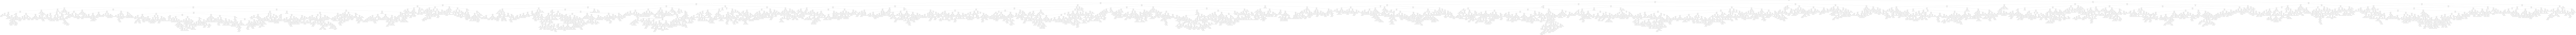

In [19]:
from sklearn.tree import export_graphviz
estimator = modelo.estimators_[0]
export_graphviz(estimator, out_file='tree1.dot')

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')

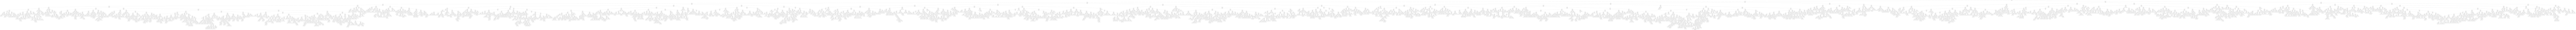

In [20]:
estimator = modelo_per_feature.estimators_[0]
export_graphviz(estimator, out_file='tree2.dot')

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree2.png')

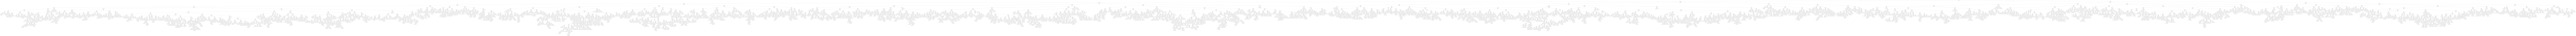

In [21]:
estimator = modelo_accumulative.estimators_[0]
export_graphviz(estimator, out_file='tree3.dot')

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree3.dot', '-o', 'tree3.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree3.png')